<h1>BREAST CANCER CAMPAIGN</h1>
<p>
After the delivery of the first part of the Campaign successfully, the company wanted to implement a simple classification model that would classify the diagnosis for a patient based on the same features collected from the Wisconsin Breast Cancer dataset.</p>
<p>You are required to:</p>
<ul>
<li>Select the most important features in the Breast Cancer dataset.</li>
<li>Train multiple classifiers on the dataset to predict the diagnosis class.</li>
<li>Achieve an acceptable accuracy score.</li>
</ul>

<h2>Import Libraries</p>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score, KFold


<h2>Reading the Dataset</h2>
<p>Load the previously pre-processed dataset saved in the CSV file "data_refined.csv" into a Pandas DataFrame.</p>

In [42]:
#load the data
data = pd.read_csv('data_refined.csv')
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.593753,0.792037,0.703140,0.686364,0.605518,0.356147,0.120469,...,0.135682,0.300625,0.311645,0.183042,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.289880,0.181768,0.203608,0.379798,0.141323,0.156437,0.082589,...,0.046970,0.253836,0.084539,0.091110,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.514309,0.431017,0.462512,0.509596,0.211247,0.229622,0.094303,...,0.096768,0.389847,0.205690,0.127006,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.811321,0.811361,0.565604,0.776263,1.000000,0.139091,0.175875,...,0.142955,0.353665,0.728148,0.287205,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.430351,0.347893,0.463918,0.378283,0.186816,0.233822,0.093065,...,0.143636,0.357075,0.136179,0.145800,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


<h2>Feature Selection</h2>
<p>Choosing only the most important features for training your classifier is one of the most important steps of the machine learning process. This can be done in many ways.
One of the simplest approaches is choosing the features with the highest correlation to the target data.
The label, in this case, is the 'Diagnosed' column.
The Diagnosed column has two distinct values:</p>
<ul>
    <li>M: Malignant Tumor</li>
    <li>B: Benign Tumor</li>
</ul>
<p>Selection approach:</p>
<ul>
    <li>Calculate the correlation of all the features to their target labels.</li>
    <li>Choose the most correlated features above a certain limit for training.</li>
    <li>Output a list of important feature names.</li>
</ul>

<Axes: >

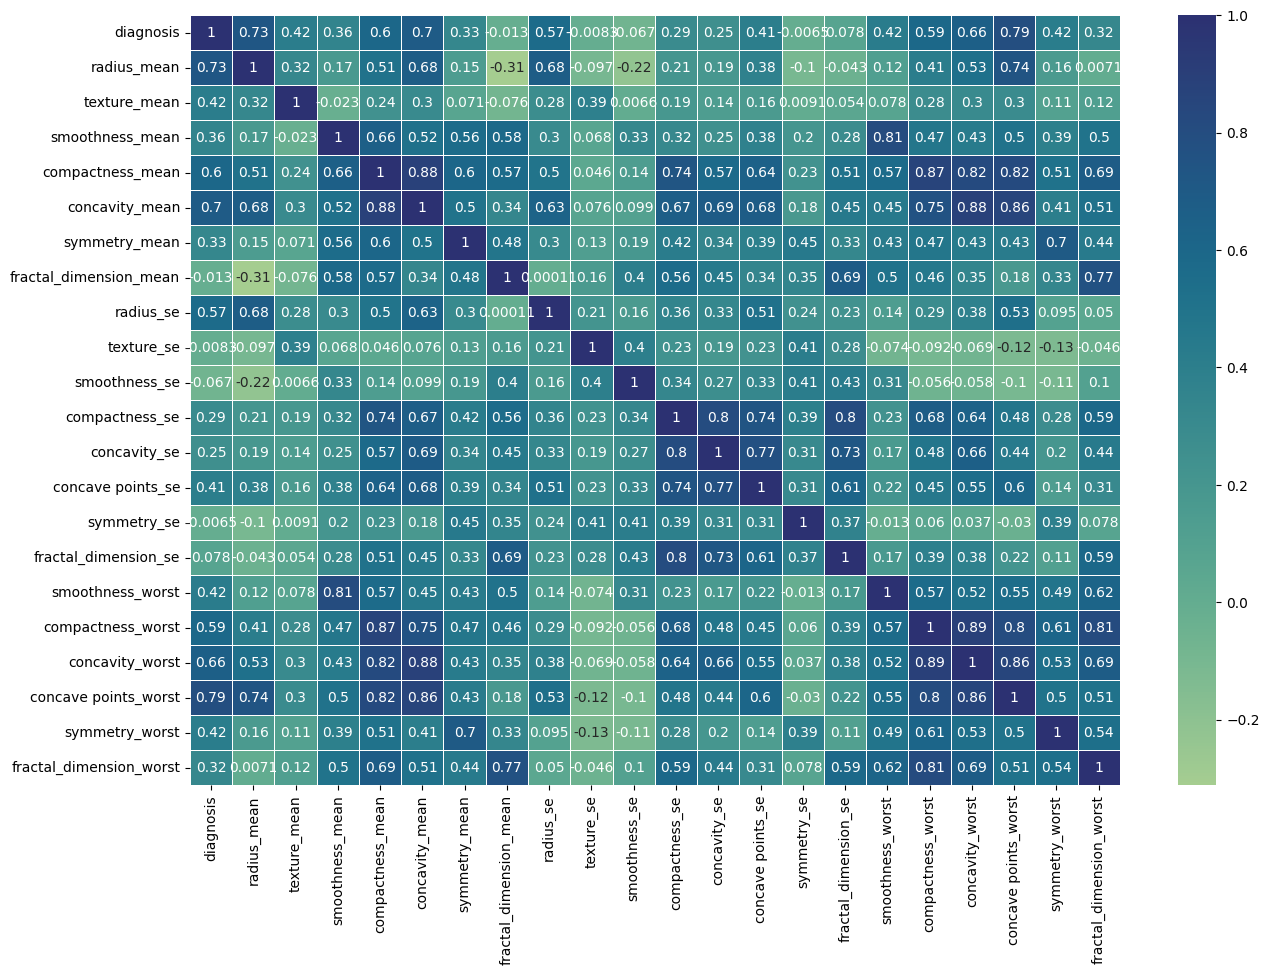

In [43]:
#Correlation using heatmap
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(data.corr(), annot = True, linewidth=.5, cmap="crest")

In [44]:
#Choose the most correlated features above 0.5 for training.
diagnosis_most_corr = data.corr()[abs(data.corr()['diagnosis'])>=0.3]

#Output a list of important feature names.
selected_variables = diagnosis_most_corr.index
selected_variables

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean', 'radius_se',
       'concave points_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [45]:
#filter data based on the selected variables
selected_data = data[selected_variables]

#selected features variables
X = selected_data.iloc[:, 1:]
X_full = data.iloc[:, 1:]

#target variable
y = selected_data['diagnosis']
y_full = data['diagnosis']


<h2>Splitting the Data</h2>
<ul>
    <li>80% training set.</li>
    <li>20% test set.</li>
</ul>

In [46]:
#Split features to train and test values for reduced features dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split features to train and test values for full dataset
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.20, random_state=42)

<h2>Training Classifiers</h2>
<p>We use CSS in many of our day-to-day tasks. In real life, we may use a form to complete a survey or to register for an activity. In the technical world, however, forms can be used to schedule an appointment online, log in to a website, or even give feedback on a certain platform.</p>
<ul>
<li>We will use KNN classifier, random forest classifier, and support vector classifier (SVC) models to train our data.</li>
<li>Train our full features dataset and our reduced set features dataset.</li>
<li>Get accuracy scores and confusion matrices for both.</li>
<li>We need a minimum accuracy score of 94%</li>
<li>Compare the r
esults.</li>
</ul>

<p>Hint: We need to choose the optimal value for k using cross-validation.</p>

<h3>Using KNN for breast cancer classification</h3>

FULL FEATURES:
cross validation score: 95.82%


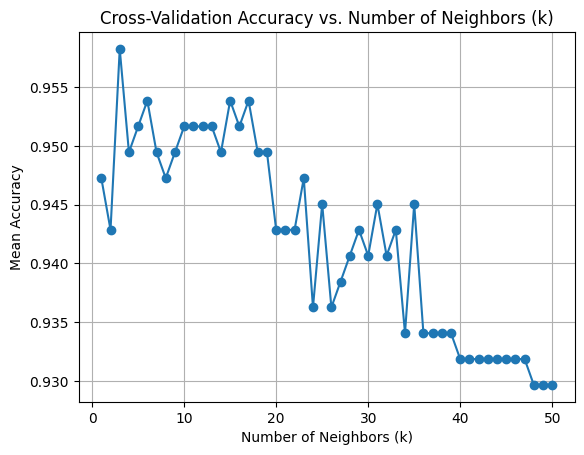

optimal_k = 3
test score = 94.74%
confusion matrix = [[68  3]
 [ 3 40]]

REDUCED FEATURES
cross validation score: 95.60%


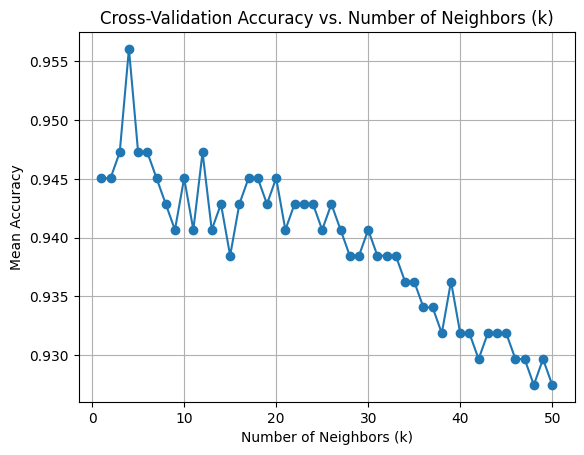

optimal_k = 4
test score = 95.61%
confusion matrix = [[69  2]
 [ 3 40]]


In [47]:
# Cross-validation for choosing the optimal k in KNN
def choose_optimal_k(X, y, max_k=50):
    #initialize mean scores
    mean_scores = []

    # KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Try different values of k
    for k in range(1, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        
        # Use cross_val_score to compute accuracy for each k value
        scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
        
        # Calculate the mean accuracy for the current k
        mean_scores.append(np.mean(scores))
    #iotunak k
    optimal_k = np.argmax(mean_scores) + 1  # +1 because k starts from 1
    print(f'cross validation score: {mean_scores[optimal_k-1]*100:.2f}%')

    # Plot results
    plt.plot(range(1, max_k + 1), mean_scores, marker='o')
    plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.show()
    return optimal_k

def knn(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.score(X_test, y_test)
    conf = conf = confusion_matrix(y_test, y_pred)
    return y_score, conf

print('FULL FEATURES:')
n_neighbors = choose_optimal_k(X_full_train, y_full_train)
print(f'optimal_k = {n_neighbors}')
y_score, conf = knn(X_full_train, y_full_train, X_full_test,  y_full_test, n_neighbors)
print(f'test score = {y_score*100:.2f}%')
print(f'confusion matrix = {conf}\n')

print('REDUCED FEATURES')
n_neighbors = choose_optimal_k(X_train, y_train)
print(f'optimal_k = {n_neighbors}')
y_score, conf = knn(X_train, y_train, X_test, y_test, n_neighbors)
print(f'test score = {y_score*100:.2f}%')
print(f'confusion matrix = {conf}')




<h3>Using Random Forest for breast cancer classification</h3>

FULL FEATURES:
cross validation score: 95.82%


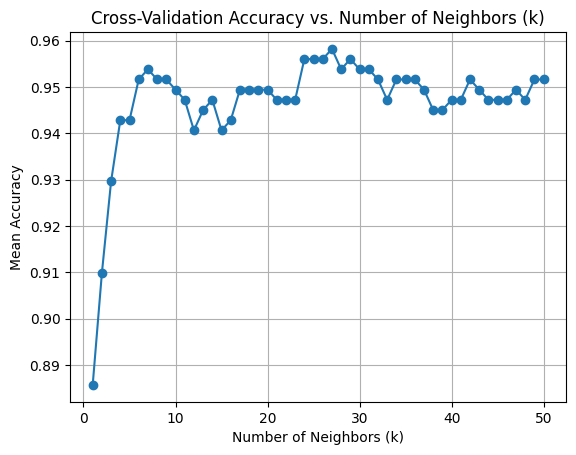

optimal_k = 27
test score = 95.61%
confusion matrix = [[69  2]
 [ 3 40]]

REDUCED FEATURES
cross validation score: 95.82%


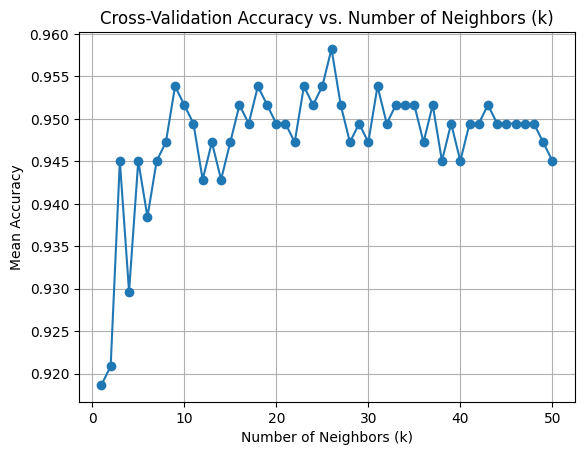

optimal_k = 26
test score = 96.49%
confusion matrix = [[70  1]
 [ 3 40]]


In [48]:
# Cross-validation for choosing the optimal k in KNN
def choose_optimal_k(X, y, max_k=50):
    #initialize mean scores
    mean_scores = []

    # KFold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Try different values of k
    for k in range(1, max_k + 1):
        rf = RandomForestClassifier(n_estimators=k, random_state=42)
        
        # Use cross_val_score to compute accuracy for each k value
        scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')
        
        # Calculate the mean accuracy for the current k
        mean_scores.append(np.mean(scores))
    #iotunak k
    optimal_k = np.argmax(mean_scores) + 1  # +1 because k starts from 1
    print(f'cross validation score: {mean_scores[optimal_k-1]*100:.2f}%')

    # Plot results
    plt.plot(range(1, max_k + 1), mean_scores, marker='o')
    plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Mean Accuracy')
    plt.grid(True)
    plt.show()
    return optimal_k

def RadomForest(X_train, y_train, X_test, y_test, n_estimators):
    model = RandomForestClassifier(n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.score(X_test, y_test)
    conf = conf = confusion_matrix(y_test, y_pred)
    return y_score, conf

print('FULL FEATURES:')
n_estimators = choose_optimal_k(X_full_train, y_full_train)
print(f'optimal_k = {n_estimators}')
y_score, conf = RadomForest(X_full_train, y_full_train, X_full_test,  y_full_test, n_estimators)
print(f'test score = {y_score*100:.2f}%')
print(f'confusion matrix = {conf}\n')

print('REDUCED FEATURES')
n_estimators = choose_optimal_k(X_train, y_train)
print(f'optimal_k = {n_estimators}')
y_score, conf = RadomForest(X_train, y_train, X_test, y_test, n_estimators)
print(f'test score = {y_score*100:.2f}%')
print(f'confusion matrix = {conf}')



<h3>Using SVC for breast cancer classification</h3>

REDUCED FEATURES:
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}

Test accuracy: 0.9561

All parameter values and their corresponding scores:
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} => Mean CV score: 0.9275
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'} => Mean CV score: 0.9736
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'} => Mean CV score: 0.9231
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'} => Mean CV score: 0.5341
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'} => Mean CV score: 0.9275
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'} => Mean CV score: 0.6286
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} => Mean CV score: 0.6967
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'} => Mean CV score: 0.6286
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} => Mean CV score: 0.9560
Parameters:

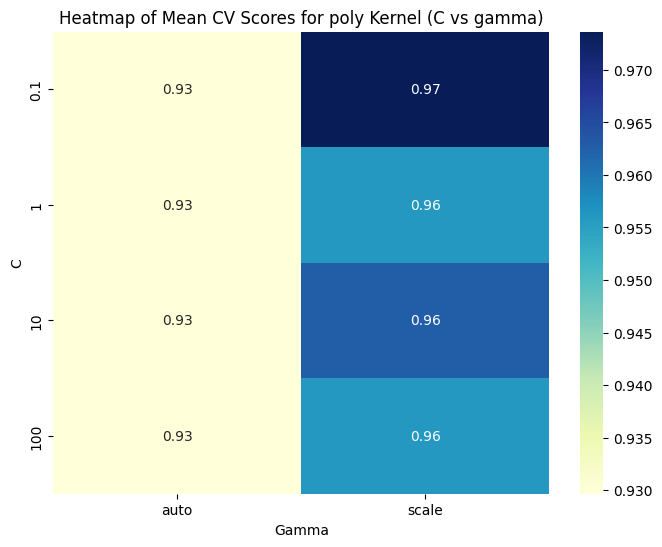


FULL FEATURES:
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

Test accuracy: 0.9649

All parameter values and their corresponding scores:
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'} => Mean CV score: 0.9319
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'} => Mean CV score: 0.9670
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'} => Mean CV score: 0.9429
Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'} => Mean CV score: 0.5648
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'} => Mean CV score: 0.9319
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'} => Mean CV score: 0.6286
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} => Mean CV score: 0.6330
Parameters: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'} => Mean CV score: 0.6286
Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'} => Mean CV score: 0.9604
Parameters: {'C

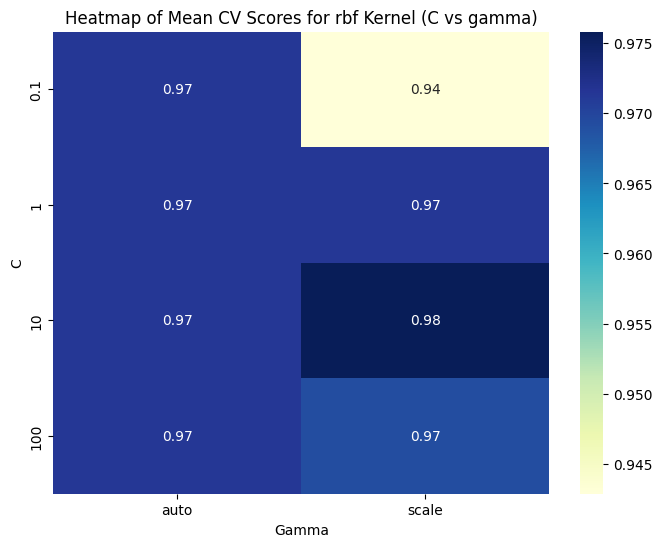

In [49]:
def opt_SVC(X_train, y_train, X_test, y_test):

    # Define the parameter grid for SVC
    param_grid = {
        'C': [0.1, 1, 10, 100],            # Regularization parameter
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Types of kernels
        'gamma': ['scale', 'auto']  # Kernel coefficient (use 'scale' or 'auto' for rbf, poly, etc.)
    }

    # Set up the SVC model
    svc = SVC()

    # Set up GridSearchCV for cross-validation to find the best parameters
    grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

    # Fit the model using the training data
    grid_search.fit(X_train, y_train)

    # Get all the parameter values and their corresponding cross-validation scores
    cv_results = grid_search.cv_results_

     # Output the best parameters found
    print("\nBest parameters found: ", grid_search.best_params_)

    # Test the model with the best parameters on the test set
    best_svc = grid_search.best_estimator_
    y_pred = best_svc.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest accuracy: {accuracy:.4f}")

    
    # Print all parameter values and their corresponding scores
    print("\nAll parameter values and their corresponding scores:")
    for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
        print(f"Parameters: {params} => Mean CV score: {mean_score:.4f}")
   

    # Plot results for C vs gamma for different kernels (here we plot only for the 'best' kernel )

    # Filter the results for the 'best' kernel
    best_params =  grid_search.best_params_
    results = [result for result in zip(cv_results['params'], cv_results['mean_test_score']) if result[0]['kernel'] == best_params['kernel']]

    # Extract the 'C', 'gamma' values and their corresponding mean scores
    C_vals = [result[0]['C'] for result in results]
    gamma_vals = [result[0]['gamma'] for result in results]
    mean_scores = [result[1] for result in results]

    # Create a grid for C and gamma
    C_unique = sorted(set(C_vals))
    gamma_unique = sorted(set(gamma_vals))
    scores_matrix = np.zeros((len(C_unique), len(gamma_unique)))

    # Fill the score matrix for plotting
    for i, C_val in enumerate(C_unique):
        for j, gamma_val in enumerate(gamma_unique):
            scores_matrix[i, j] = mean_scores[C_vals.index(C_val) if gamma_vals[C_vals.index(C_val)] == gamma_val else -1]

    # Plotting the heatmap
    C_mesh, gamma_mesh = np.meshgrid(C_unique, gamma_unique)
    plt.figure(figsize=(8, 6))
    sn.heatmap(scores_matrix, annot=True, cmap="YlGnBu", xticklabels=gamma_unique, yticklabels=C_unique)
    plt.title(f'Heatmap of Mean CV Scores for {best_params['kernel']} Kernel (C vs gamma)')
    plt.xlabel('Gamma')
    plt.ylabel('C')
    plt.show()
print('REDUCED FEATURES:')
opt_SVC(X_train, y_train, X_test, y_test)
print('\nFULL FEATURES:')
opt_SVC(X_full_train, y_full_train, X_full_test, y_full_test)


<h3>COMPARISON:</H3>




<table border="1">   
<tr>
    <th rowspan="2">Model</th>
        <th colspan="3">Full Features</th>
        <th colspan="3">Reduced Features</th>
</tr>
    <tr>
        <th>Optimal parameters</th>
        <th>Cross-validation [%]</th>
        <th>Test Score [%]</th>
        <th>Optimal parameters</th>
        <th>Cross-validation [%]</th>
        <th>Test Score [%]</th>

</tr>
        

<tbody>
    <tr>
        <td>KNN</td>
        <td>3</td>
        <td>95.82</td>
        <td>94.74</td>
        <td>4</td>
        <td>95.60</td>
        <td>95.61</td>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>27</td>
        <td>95.82</td>
        <td>95.61</td>
        <td>26</td>
        <td>95.82</td>
        <td>96.49</td>
    </tr>
    <tr>
        <td>SVC</td>
        <td>C = 10, gamma = 'scale', Kernel = 'rbf'</td>
        <td>98</td>
        <td>96.49</td>
        <td>C = 0.1, gamma = 'scale', Kernel = 'poly'</td>
        <td>97</td>
        <td>95.61</td>
    </tr>
</tbody>

</table>   

<p>We can conclude:</p>
<ul>
    <li>For knn and Random Forest model, 'Reduced features' have higher test score than 'Full features'</li>
    <li>For knn and Random Forest model, 'Reduced features' test score is better than 'cross validation' score</li>
    <li>For SVC model, test score decrease slitly compared to cross validation score but the score for 'Reduced features' is still more robuste (95.61/97 > 96.49/98)</li>
    <li>SVC and Ramdom forest have the best test score (96.49%) with:
        <ul> 
            <li>parameters { C = 10, gamma = 'scale', Kernel = 'rbf' } applied on full features, and</li>
            <li>parameters k = 26 applied on reduced features</li>
        </ul>
    </li>
    <li>In term of performance, the reduced features are rebuste, so they can be used to represent the full features</li>
</ul>

